## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
study_results_clean_path = "data/Study_results_Cleaned.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset  - key is Mouse ID
merge_pharma_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")



# Display the data table for preview
merge_pharma_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice. There are 249 mice

grouped_mouseID_df = merge_pharma_df.groupby(["Mouse ID"])

grouped_mouseID_df['Mouse ID'].value_counts()

Mouse ID  Mouse ID
a203      a203        10
a251      a251        10
a262      a262        10
a275      a275        10
a366      a366         7
                      ..
z435      z435         3
z578      z578        10
z581      z581        10
z795      z795        10
z969      z969        10
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
group_timepoint_df = merge_pharma_df.groupby(["Timepoint"])
group_timepoint_df['Timepoint'].value_counts()

#mice_ID_count = group_timepoint_df["Mice ID"].value_counts()

# found duplicate mouse is within Timepoint 0 since there are 249 mice

# used MS Excel and pivot table to identify the duplicate mouse id: g989.  Excel file that was used is in GitHub

Timepoint  Timepoint
0          0            250
5          5            238
10         10           223
15         15           207
20         20           195
25         25           183
30         30           171
35         35           154
40         40           142
45         45           130
Name: Timepoint, dtype: int64

In [4]:
#another approach to find duplicate mouse (currently unsuccessful)

#mice_duplicate_ID = merge_pharma_df.loc[merge_pharma_df["Timepoint"]].groupby("Mouse ID").count()

#sort_descend_timepoint = mice_duplicate_ID.sort_values(by=['Timepoint'], ascending=False,inplace=True)
#mice_duplicate_ID.head()

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. (currently unsuccessful)
#group_timepoint_df.head()
#merge_pharma_df
#merge_pharma_df = merge_pharma_df.set_index("Mouse ID")
#merge_pharma_df = merge_pharma_df.drop("g989", axis=0)

#clean_pharma_df = group_timepoint_df.loc['g989'].drop['g989'], axis=0)

# Source: https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/#:~:text=To%20delete%20rows%20and%20columns,the%20%E2%80%9Caxis%E2%80%9D%20as%201.

In [7]:
# Brut force using the MS Excel method to find and clean data.  New CSV file is named "Study_results_Cleaned.csv"

study_results_clean = pd.read_csv(study_results_clean_path)

# Combine the clean data into a single dataset  - key is Mouse ID
clean_merge_pharma_df = pd.merge(mouse_metadata, study_results_clean, on="Mouse ID")


# Display the data table for preview

clean_merge_pharma_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2
1888,z969,Naftisol,Male,9,30,30,65.841013,3
1889,z969,Naftisol,Male,9,30,35,69.176246,4
1890,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_group_timepoint_df = clean_merge_pharma_df.groupby(["Timepoint"])
clean_group_timepoint_df['Timepoint'].value_counts()

Timepoint  Timepoint
0          0            249
5          5            238
10         10           223
15         15           207
20         20           195
25         25           183
30         30           171
35         35           154
40         40           142
45         45           130
Name: Timepoint, dtype: int64

## Summary Statistics

In [9]:
# FAILED ATTEMPT

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#tumor_volumes = clean_merge_pharma_df["Tumor Volume (mm3)"]

#mean_numpy = np.mean(tumor_volumes)
#median_numpy = np.median(tumor_volumes)
#sd_numpy = np.std(tumor_volumes, ddof=0)
#var_numpy = np.var(tumor_volumes, ddof=0)
#SEM_scipy = st.sem(tumor_volumes)

#>>>>>>>>>>>>>>>>>>>>>> Looking at grouping and then using numpy functions for calculating >>>>>>>>>>>>>>>>>>
#grouped_regimen_df = clean_merge_pharma_df.groupby(["Drug Regimen"])


#tumor_stats ={'Tumor Volume Mean': [np.mean(tumor_volumes)]}
#df = pd.DataFrame(tumor_stats, columns=['Tumor Volume Mean'])
#print(df)

#tumor_volumes = pd.DataFrame({mean_numpy, median_numpy, SEM_scipy})
#tumor_volumes.head()

# List columns

clean_merge_pharma_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#clean_merge_pharma_df.describe()

grouped_regimen_df = clean_merge_pharma_df.groupby(["Drug Regimen"])

regimen_avg_tumorvolume = round(grouped_regimen_df["Tumor Volume (mm3)"].mean(), 3)
regimen_median_tumorvolume = round(grouped_regimen_df["Tumor Volume (mm3)"].median(), 3)
regimen_stddev_tumorvolume = round(grouped_regimen_df["Tumor Volume (mm3)"].std(), 3)
regimen_var_tumorvolume = round(grouped_regimen_df["Tumor Volume (mm3)"].var(), 3)
regimen_SEM_tumorvolume = round(grouped_regimen_df["Tumor Volume (mm3)"].sem(), 3)

grouped_regimen_df = pd.DataFrame({"Average Tumor Volume (mm3)":regimen_avg_tumorvolume,
                                  "Median Tumor Volume (mm3)":regimen_median_tumorvolume,
                                  "Std Dev Tumor Volume (mm3)": regimen_stddev_tumorvolume,
                                  "Variance Tumor Volume (mm3)": regimen_var_tumorvolume,
                                  "SEM Tumor Volume (mm3)": regimen_SEM_tumorvolume
                                  })

grouped_regimen_df


,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Std Dev Tumor Volume (mm3),Variance Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.676,41.558,4.995,24.948,0.329
Ceftamin,52.591,51.776,6.268,39.290,0.470
Infubinol,52.885,51.821,6.567,43.129,0.492
Ketapril,55.236,53.699,8.280,68.554,0.604
Naftisol,54.332,52.509,8.135,66.173,0.596
Placebo,54.034,52.289,7.821,61.168,0.581
Propriva,52.368,50.910,6.502,42.278,0.514
Ramicane,40.217,40.673,4.846,23.487,0.321
Stelasyn,54.233,52.432,7.710,59.451,0.573


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
# source: https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/

grouped_regimen_df_2 = round(clean_merge_pharma_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean,np.median,np.std,np.var,st.sem]),3)

grouped_regimen_df_2

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,4.995,24.948,0.329
Ceftamin,52.591,51.776,6.268,39.290,0.470
Infubinol,52.885,51.821,6.567,43.129,0.492
Ketapril,55.236,53.699,8.280,68.554,0.604
Naftisol,54.332,52.509,8.135,66.173,0.596
Placebo,54.034,52.289,7.821,61.168,0.581
Propriva,52.368,50.910,6.502,42.278,0.514
Ramicane,40.217,40.673,4.846,23.487,0.321
Stelasyn,54.233,52.432,7.710,59.451,0.573


## Bar and Pie Charts

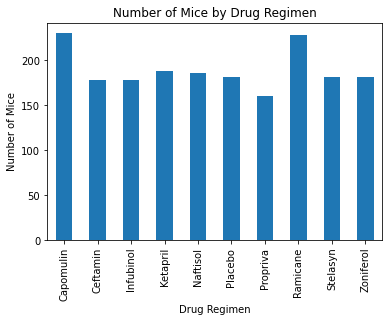

In [56]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


regimen_group = clean_merge_pharma_df.groupby('Drug Regimen')
regimen_mice = regimen_group["Mouse ID"].count()
regimen_mice.head()


regimen_chart = regimen_mice.plot(kind="bar", title = "Number of Mice by Drug Regimen")
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Number of Mice")

plt.show()


In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
